<a href="https://colab.research.google.com/github/gojiteji/AI_vocab_comparison/blob/main/transformers_support_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b1fd0c7bc9862dca4c3710d0478734b945bcbc0402007bd269bf1ee7115a8a7b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [56]:
import pandas as pd
import re
from io import StringIO
import japanize_matplotlib

file_path = 'tmp.md'
with open(file_path, 'r') as file:
    markdown_content = file.read()

# Parsing the markdown table into a pandas dataframe for easier analysis
def parse_markdown_table(md_content):
    # Split the content into lines
    lines = md_content.split("\n")

    # Find the start and end of the table
    start, end = None, None
    for i, line in enumerate(lines):
        if "|" in line:
            start = start if start is not None else i
            end = i

    # Extract the relevant lines and remove the header separator
    table_lines = lines[start:end+1]
    table_lines.pop(1)  # Remove the header separator

    # Create a dataframe from the table
    return pd.read_csv(StringIO("\n".join(table_lines)), sep="|")

# Parse the markdown content
df = parse_markdown_table(markdown_content)

# Clean and format the dataframe
df = df.dropna(axis=1, how='all')  # Remove empty columns
df.columns = df.columns.str.strip()  # Strip whitespace from column names
for col in df.columns:
    df[col] = df[col].str.strip()  # Strip whitespace from each cell

# Replace checkmark and cross symbols with boolean values
df.replace({'✅': True, '❌': False}, inplace=True)

# Display the first few rows of the dataframe for verification
df.head()

,Model,PyTorch support,TensorFlow support,Flax Support
0,[ALBERT](model_doc/albert),True,True,True
1,[ALIGN](model_doc/align),True,False,False
2,[AltCLIP](model_doc/altclip),True,False,False
3,[Audio Spectrogram Transformer](model_doc/audi...,True,False,False
4,[Autoformer](model_doc/autoformer),True,False,False


In [64]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from matplotlib_venn import venn3

# Extracting boolean arrays for each framework support
pytorch_support = df['PyTorch support']
tensorflow_support = df['TensorFlow support']
flax_support = df['Flax Support']

In [65]:
modelnames=df["Model"]

In [66]:
pytorch_support_list=modelnames[pytorch_support].values.tolist()
tensorflow_support_list=modelnames[tensorflow_support].values.tolist()
flax_support_list=modelnames[flax_support].values.tolist()

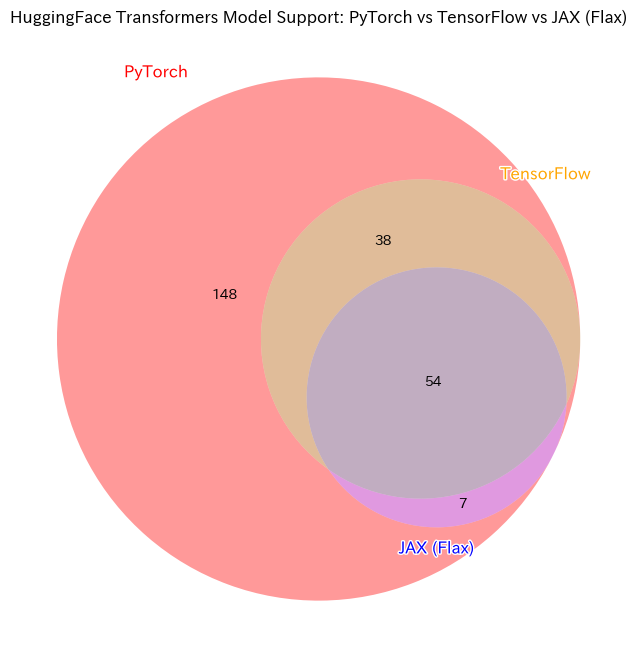

In [74]:
# Creating the Venn diagram

plt.figure(figsize=(8, 8))
venn = venn3(subsets=(set(pytorch_support_list), set(tensorflow_support_list), set(flax_support_list)), set_labels=('PyTorch', 'TensorFlow', 'JAX (Flax)'))

colors = ['red', 'orange', 'blue']
for text, color, circle in zip(venn.set_labels, colors, venn.subset_labels):
    text.set_color(color)
    text.set_path_effects([withStroke(linewidth=2, foreground='white')])

# Display the Venn diagram
plt.title("HuggingFace Transformers Model Support: PyTorch vs TensorFlow vs JAX (Flax)")

plt.show()